In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation

Text(0.5, 0, 'z')

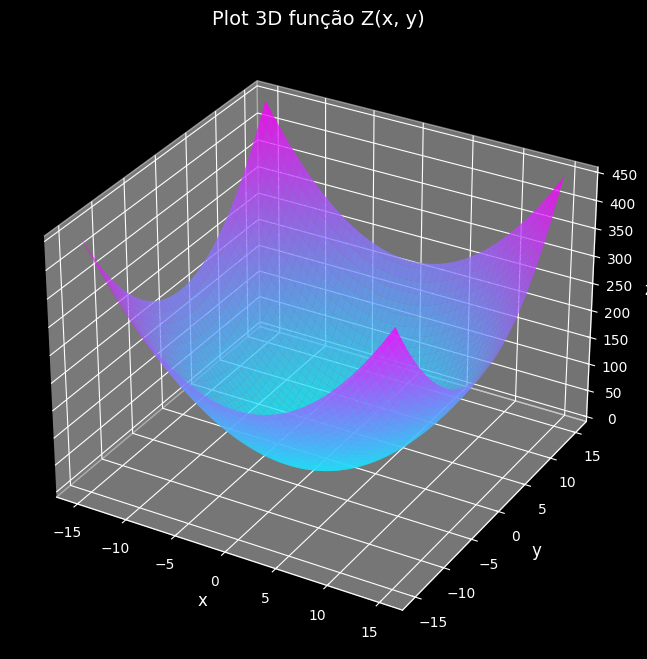

In [2]:
# Função Custo
def funcao_custo(x, y):
    return x**2 + y**2

# Vetor Gradiente
def gradiente(x, y):
    return np.array([2*x, 2*y])

# Gráfico
x_grid = np.linspace(-15, 15, 100)
y_grid = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = funcao_custo(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection= '3d')

ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.8)

ax.set_title('Plot 3D função Z(x, y)', fontsize=14)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)


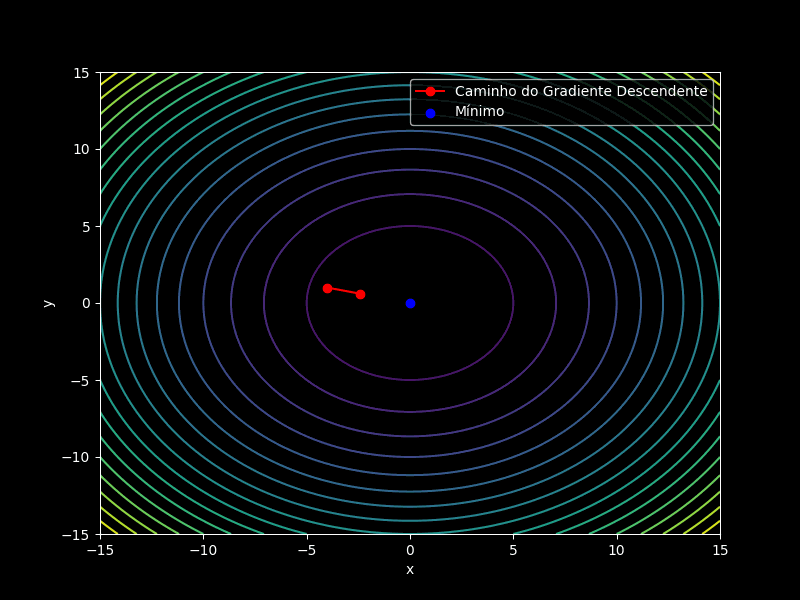

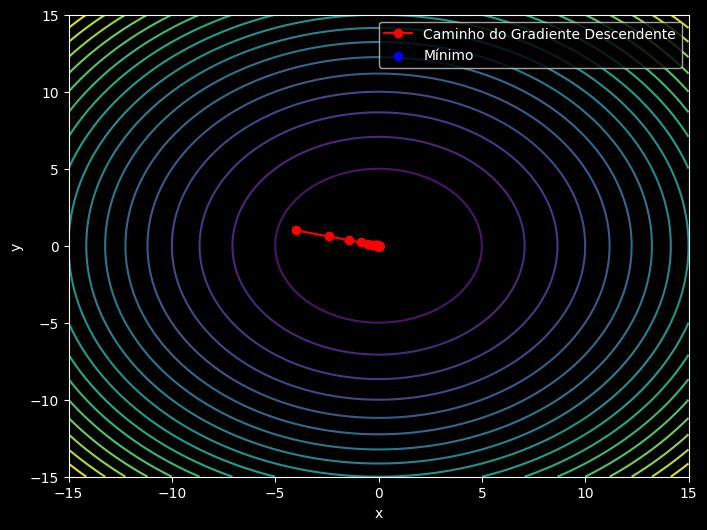

In [23]:
from matplotlib.animation import PillowWriter

# Parâmetros do Gradiente
passos = 0.2  # learning_rate
iteracoes = 50  # iterations

# Ponto Inicial
x, y = random.randint(-10, 10), random.randint(-10, 10)
valores_x, valores_y = [x], [y]  # x_vals, y_vals

# Criar uma grade para o gráfico de contorno
grade_x = np.linspace(-15, 15, 100)  # x_grid
grade_y = np.linspace(-15, 15, 100)  # y_grid
X, Y = np.meshgrid(grade_x, grade_y)
Z = funcao_custo(X, Y)  # funcao_custo é a função de custo usada no cálculo

# Gráfico de Contorno
fig, ax = plt.subplots(figsize=(8, 6))
contorno = ax.contour(X, Y, Z, levels=20, cmap='viridis')
caminho, = ax.plot([], [], 'ro-', label='Caminho do Gradiente Descendente')  # Gradient Descent Path
ponto_minimo = ax.scatter(0, 0, color='blue', label='Mínimo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# Função para animação
def init():
    caminho.set_data([], [])
    return caminho,

def atualizar(frame):  # upgrade traduzido como atualizar
    global x, y
    grad = gradiente(x, y)  # gradiente é a função que calcula o gradiente
    x -= passos * grad[0]
    y -= passos * grad[1]
    valores_x.append(x)
    valores_y.append(y)
    caminho.set_data(valores_x, valores_y)
    return caminho,

ani = FuncAnimation(fig, atualizar, frames=iteracoes, init_func=init, blit = True, repeat= False )
ani.save('gradiente_descendente.gif', writer = PillowWriter(fps= 10))
from IPython.display import Image
Image('gradiente_descendente.gif')